In [1]:
#Exploration des données 

In [1]:
"""
Import
"""
import os 
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt 
import requests
import numpy as np

In [3]:
#r = requests.get('https://api.tela-botanica.org/service:cel:CelWidgetExport/export?pays=FR%2CFX%2CGF%2CPF%2CTF&programme=tb_lichensgo&standard=1&debut=0&limite=20000&format=csv&colonnes=standardexport,auteur,avance,etendu,standard', auth=('user', 'pass'))

In [4]:
#url = requests.get('https://api.tela-botanica.org/service:cel:CelWidgetExport/export?pays=FR%2CFX%2CGF%2CPF%2CTF&programme=tb_lichensgo&standard=1&debut=0&limite=20000&format=csv&colonnes=standardexport,auteur,avance,etendu,standard')

In [5]:
# import pandas as pd
# import requests
# url = "https://api.tela-botanica.org/service:cel:CelWidgetExport/export?pays=FR%2CFX%2CGF%2CPF%2CTF&programme=tb_lichensgo&standard=1&debut=0&limite=20000&format=csv&colonnes=standardexport,auteur,avance,etendu,standard"
# s=requests.get(url).content
# df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [2]:
df = pd.read_csv("./DataOrigine/cel_export.csv")

In [3]:
df_copy = df.copy()

#création de l'id site 
df_copy["Id_site"] = df_copy["ext:latitude-releve"].astype(str) + df_copy["ext:longitude-releve"].astype(str)

In [4]:
# Taille du Dataframe  2776 Lignes et 60 Colonnes
df_copy.shape

(2776, 61)

In [5]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Nom retenu,Numéro nomenclatural nom retenu,Famille,Référentiel taxonomique,Certitude,Type d'observation,...,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,ext:com-arbres,ext:latitude-arbres,ext:longitude-arbres,ext:altitude-arbres,Id_site
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN,42.5518622.972345
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN,42.5518622.972345
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN,42.5518622.972345
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568.0,Xanthoria parietina,59568.0,NaN,taxref,à déterminer,observation de terrain,...,NaN,Rue de Taxo,NaN,3601642.0,n2;n3;n4;,NaN,NaN,NaN,NaN,nannan
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232.0,Physcia adscendens/tenella,196232.0,NaN,taxref,à déterminer,observation de terrain,...,NaN,Rue de Taxo,NaN,3601642.0,n1;n2;n3;n4;n5;,NaN,NaN,NaN,NaN,nannan


In [10]:
#Nombre de valeurs null par colonne 
df_copy.isnull().sum()

Identifiant unique         0
Identifiant                0
Espèce                     4
Numéro nomenclatural     571
Nom retenu               208
                        ... 
ext:com-arbres          2761
ext:latitude-arbres     2765
ext:longitude-arbres    2765
ext:altitude-arbres     2765
Id_site                    0
Length: 61, dtype: int64

In [11]:
#colonnes avec que les valeurs manquanets 
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df_copy)

Espèce => 4
Numéro nomenclatural => 571
Nom retenu => 208
Numéro nomenclatural nom retenu => 258
Famille => 1639
Référentiel taxonomique => 312
Identifiant Commune => 398
Floutage (niveau de localisation diffusé) => 326
Lieu-dit => 2776
Milieu => 2776
Notes => 2552
Lien vers l'observation sur IdentiPlante => 2538
Image(s) => 2538
Cohérence entre la localité et les coordonnées GPS => 2776
Précision de la localisation => 2776
Station => 2776
Score IdentiPlante => 1250
Abondance => 2776
Phénologie => 2776
Observateur => 2758
Structure de l'observateur => 2776
Déterminateur => 2776
Source bibliographique => 2776
ext:altitude-releve => 2727
ext:circonference => 2363
ext:face-ombre => 2363
ext:latitude-releve => 2374
ext:longitude-releve => 2374
ext:num_arbre => 2363
ext:rue-arbres => 2381
ext:id_obs_arbre => 413
ext:loc-sur-tronc => 426
ext:com-arbres => 2761
ext:latitude-arbres => 2765
ext:longitude-arbres => 2765
ext:altitude-arbres => 2765


In [12]:
#Valeurs null 
def donnee_manquantes(df):
    '''prints out columns with missing values with its %'''
    for col in df_copy.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
donnee_manquantes(df_copy)

Espèce => 0.14%
Numéro nomenclatural => 20.57%
Nom retenu => 7.49%
Numéro nomenclatural nom retenu => 9.29%
Famille => 59.04%
Référentiel taxonomique => 11.24%
Identifiant Commune => 14.34%
Floutage (niveau de localisation diffusé) => 11.74%
Lieu-dit => 100.0%
Milieu => 100.0%
Notes => 91.93%
Lien vers l'observation sur IdentiPlante => 91.43%
Image(s) => 91.43%
Cohérence entre la localité et les coordonnées GPS => 100.0%
Précision de la localisation => 100.0%
Station => 100.0%
Score IdentiPlante => 45.03%
Abondance => 100.0%
Phénologie => 100.0%
Observateur => 99.35%
Structure de l'observateur => 100.0%
Déterminateur => 100.0%
Source bibliographique => 100.0%
ext:altitude-releve => 98.23%
ext:circonference => 85.12%
ext:face-ombre => 85.12%
ext:latitude-releve => 85.52%
ext:longitude-releve => 85.52%
ext:num_arbre => 85.12%
ext:rue-arbres => 85.77%
ext:id_obs_arbre => 14.88%
ext:loc-sur-tronc => 15.35%
ext:com-arbres => 99.46%
ext:latitude-arbres => 99.6%
ext:longitude-arbres => 99.6%


<AxesSubplot:>

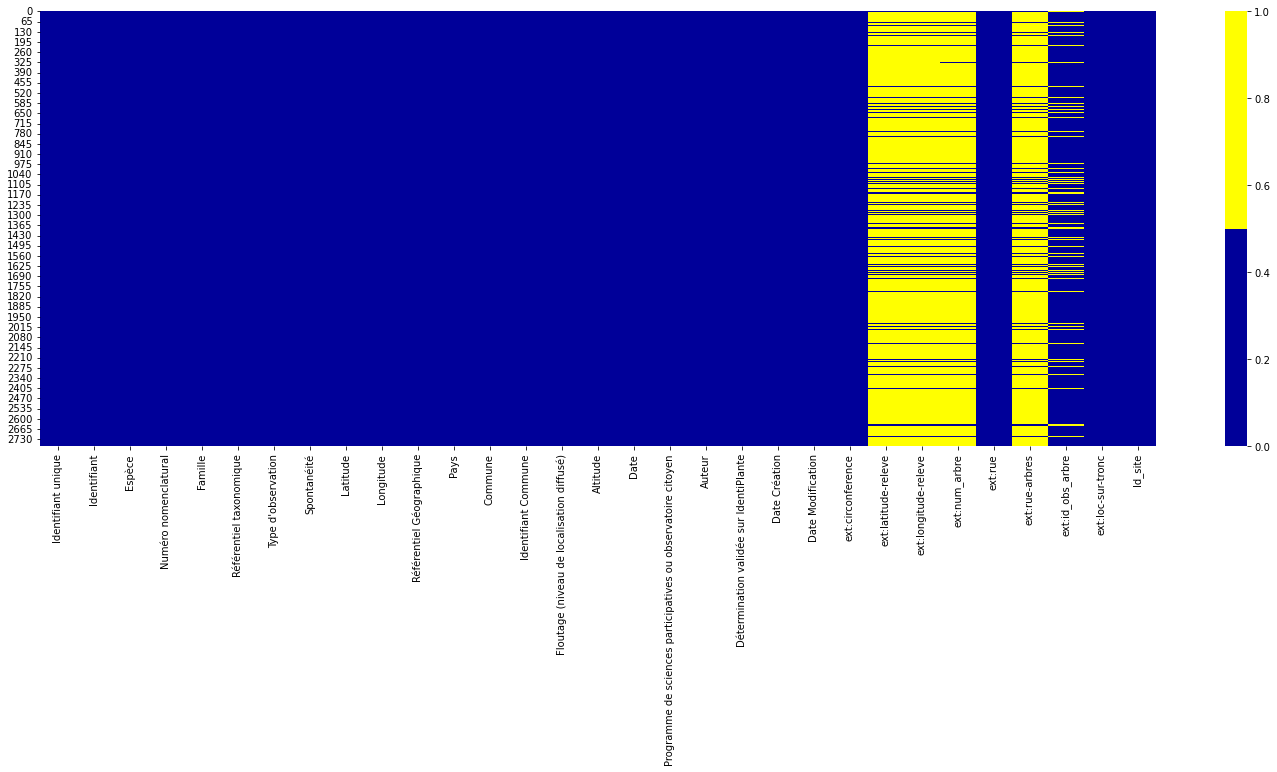

In [42]:
#carte de chaleurs des valeurs null 

def heat_map(df):
    fig, ax = plt.subplots(figsize=(25,8))
    cols = df.columns[:] 
    colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
    return sns.heatmap(df_copy[cols].isnull(), cmap=sns.color_palette(colours))

heat_map(df_copy)

In [7]:
# Suppression des colonnes non nécessaires

colonnes_a_sup = ["Lieu-dit", "Milieu", "Notes", "Lien vers l'observation sur IdentiPlante", "Image(s)", "Cohérence entre la localité et les coordonnées GPS", "Précision de la localisation",
                 "Station", "Abondance", "Phénologie", "Observateur", "Structure de l'observateur","Déterminateur","Source bibliographique", "ext:altitude-releve",
                 "ext:face-ombre", "ext:com-arbres","ext:latitude-arbres","ext:longitude-arbres","ext:altitude-arbres", "Nom retenu", "Numéro nomenclatural nom retenu",
                 "Certitude",  "Transmis", "Source de la saisie", "Mots Clés","Indicateur de fiabilité",  "Score IdentiPlante", "Abondance", "Phénologie",
                 "Présence d'un échantillon d'herbier" ,"Date Transmission"]

df_copy.drop(colonnes_a_sup, axis = 1, inplace = True)
    

In [8]:
df_copy.shape

(2776, 31)

In [16]:
missing_cols(df_copy)

Espèce => 4
Numéro nomenclatural => 571
Famille => 1639
Référentiel taxonomique => 312
Identifiant Commune => 398
Floutage (niveau de localisation diffusé) => 326
ext:circonference => 2363
ext:latitude-releve => 2374
ext:longitude-releve => 2374
ext:num_arbre => 2363
ext:rue-arbres => 2381
ext:id_obs_arbre => 413
ext:loc-sur-tronc => 426


In [17]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Modification,ext:circonference,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,Id_site
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55616,2.97596,...,2020-03-23 14:30:29,67.0,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,42.5518622.972345
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55609,2.97587,...,2020-03-23 14:31:10,72.5,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,42.5518622.972345
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55600,2.97580,...,2020-03-23 14:27:20,63.5,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,42.5518622.972345
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568.0,NaN,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,NaN,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,n2;n3;n4;,nannan
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232.0,NaN,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,NaN,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,n1;n2;n3;n4;n5;,nannan


In [9]:
# Après avoir supprimé les colonnes nécessaires, nous avons maintenant que 39 colonnes
df_copy.shape

(2776, 31)

<AxesSubplot:>

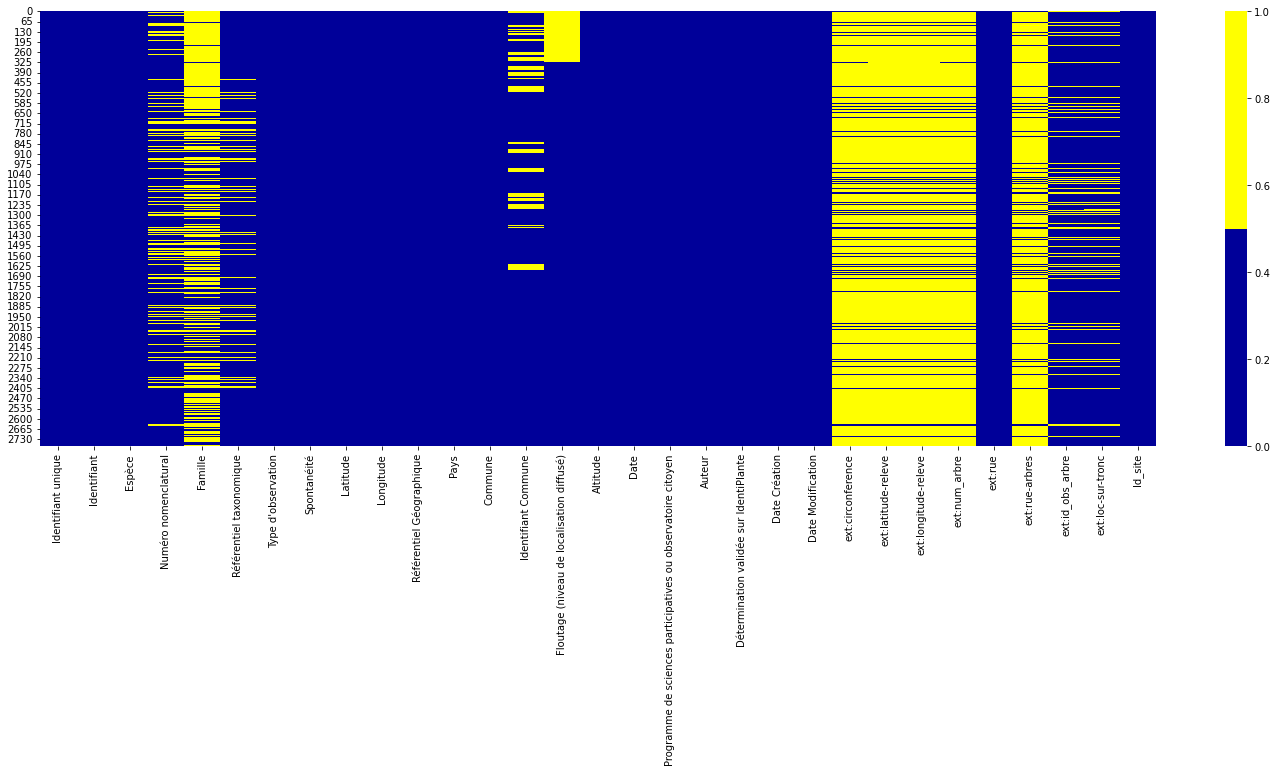

In [10]:
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_copy[cols].isnull(), cmap=sns.color_palette(colours))


In [16]:
#convertir la colonne Identifiant commune en str. 
df_copy["Identifiant Commune" ] = df_copy['Identifiant Commune'].astype(str)
df_copy["Identifiant" ] = df_copy['Identifiant'].astype(str)
df_copy["Numéro nomenclatural" ] = df_copy['Numéro nomenclatural'].astype(str)
df_copy["Détermination validée sur IdentiPlante" ] = df_copy['Détermination validée sur IdentiPlante'].astype(str)




In [12]:
donnee_manquantes(df_copy)

NameError: name 'donnee_manquantes' is not defined

In [13]:
df_copy.dtypes

Identifiant unique                                               object
Identifiant                                                      object
Espèce                                                           object
Numéro nomenclatural                                             object
Famille                                                          object
Référentiel taxonomique                                          object
Type d'observation                                               object
Spontanéité                                                       int64
Latitude                                                        float64
Longitude                                                       float64
Référentiel Géographique                                         object
Pays                                                             object
Commune                                                          object
Identifiant Commune                                             

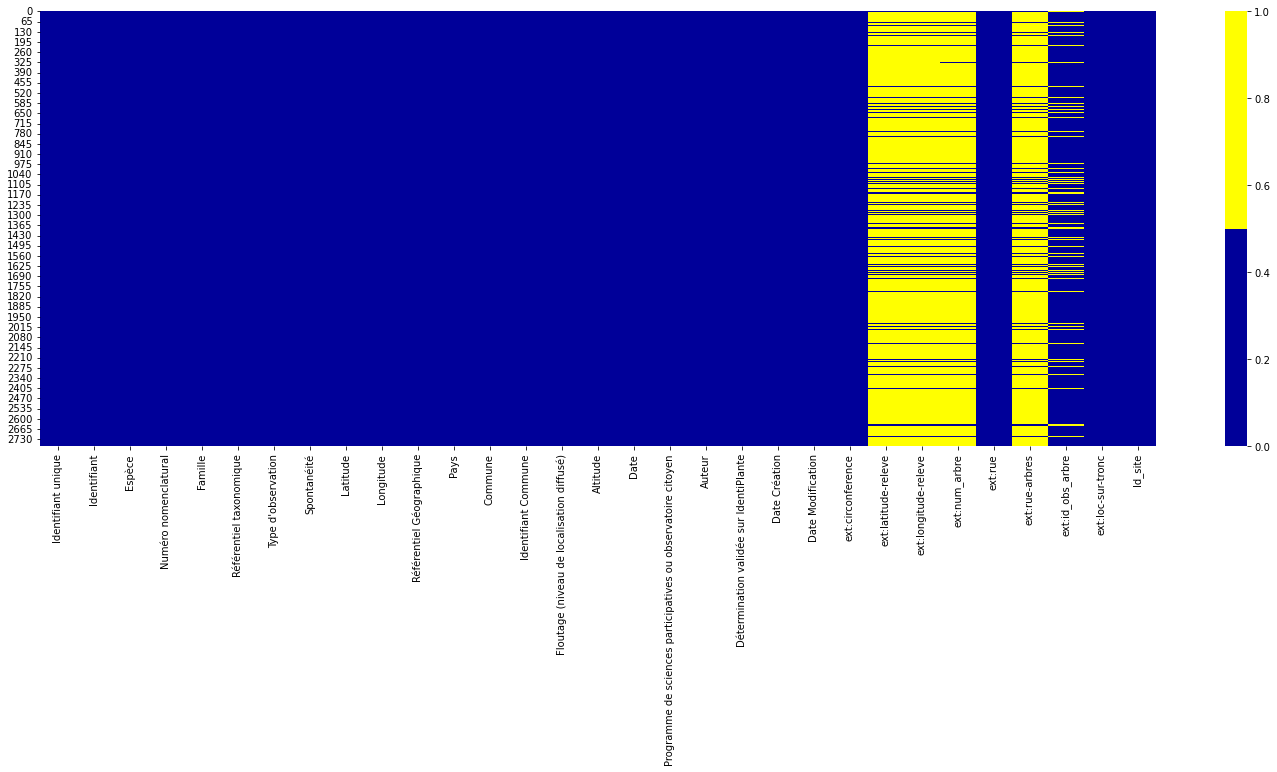

In [14]:
# Traitement des valeurs manquantes dans le dataFrame. 
df_copy.Famille = df_copy["Famille"].fillna("Null")
df_copy["Référentiel taxonomique"] = df_copy["Référentiel taxonomique"].fillna("Inconnu")
df_copy["Identifiant Commune"] = df_copy["Identifiant Commune"].fillna("Inconnu").astype(str)

df_copy["Identifiant"] = df_copy["Identifiant"].astype(str)
df_copy["Numéro nomenclatural"] = df_copy["Numéro nomenclatural"].fillna("Inconnu").astype(str)
df_copy["Espèce"] = df_copy["Espèce"].fillna("Null")
df_copy["Floutage (niveau de localisation diffusé)"] = df_copy["Floutage (niveau de localisation diffusé)"].fillna("Null")
df_copy["ext:loc-sur-tronc"] = df_copy["ext:loc-sur-tronc"].str.split(";")
df_copy['ext:circonference'] = df_copy['ext:circonference'].replace(np.nan, 0)
df_copy["ext:loc-sur-tronc"] = df_copy["ext:loc-sur-tronc"].fillna("Null").astype(str)

fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_copy[cols].isnull(), cmap=sns.color_palette(colours))

df_copy.to_csv("df_copyClean.csv")

In [24]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Modification,ext:circonference,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,Id_site
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55616,2.97596,...,2020-03-23 14:30:29,67.0,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55609,2.97587,...,2020-03-23 14:31:10,72.5,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55600,2.97580,...,2020-03-23 14:27:20,63.5,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568.0,Null,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,0.0,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,"['n2', 'n3', 'n4', '']",nannan
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232.0,Null,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,0.0,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,"['n1', 'n2', 'n3', 'n4', 'n5', '']",nannan


<h1>Extraction des tables <h1>

<h4>Table arbre <h4>

"Identifiant","Latitude","Longitude", "Espèce","Famille","ext:num_arbre", "id_site", "circonference" 


In [28]:
#Sélectionner les arbres et les exporter vers une tables uniques 
filtr_arbre_saisi =  df_copy[df_copy['ext:latitude-releve'].notnull()]
arbre_saisi = pd.DataFrame(filtr_arbre_saisi[["Identifiant","Id_site","Latitude","Longitude","Espèce","Famille","ext:num_arbre","ext:circonference"]]) 
arbre_saisi.rename(columns = {'Espèce':'Espece_arbre',
                              'Identifiant' : 'Id_arbre'}, inplace = True)
arbre_saisi.to_csv("table_arbre.csv", index=False)
arbre_saisi.head()

,Id_arbre,Id_site,Latitude,Longitude,Espece_arbre,Famille,ext:num_arbre,ext:circonference
0,3601640,42.5518622.972345,42.55616,2.97596,Celtis australis L. [1753],Null,1.0,67.0
1,3601641,42.5518622.972345,42.55609,2.97587,Celtis australis L. [1753],Null,2.0,72.5
2,3601642,42.5518622.972345,42.55600,2.97580,Celtis australis L. [1753],Null,3.0,63.5
8,3609320,45.8264671.238365,45.82575,1.23837,Acer platanoides L. [1753],Sapindaceae,1.0,98.0
9,3609321,45.8264671.238365,45.82568,1.23840,Acer platanoides L. [1753],Sapindaceae,2.0,84.0


,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Modification,ext:circonference,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,Id_site
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55616,2.97596,...,2020-03-23 14:30:29,67.0,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55609,2.97587,...,2020-03-23 14:31:10,72.5,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55600,2.97580,...,2020-03-23 14:27:20,63.5,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
8,urn:lsid:tela-botanica.org:cel:3609320,3609320,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,observation de terrain,1,45.82575,1.23837,...,2019-08-10 19:38:39,98.0,45.826467,1.238365,1.0,Avenue de Naugeat,Avenue de Naugeat,NaN,Null,45.8264671.238365
9,urn:lsid:tela-botanica.org:cel:3609321,3609321,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,observation de terrain,1,45.82568,1.23840,...,2019-08-10 19:39:35,84.0,45.826467,1.238365,2.0,Avenue de Naugeat,Avenue de Naugeat,NaN,Null,45.8264671.238365


In [26]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Modification,ext:circonference,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,Id_site
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55616,2.97596,...,2020-03-23 14:30:29,67.0,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55609,2.97587,...,2020-03-23 14:31:10,72.5,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55600,2.97580,...,2020-03-23 14:27:20,63.5,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,Null,42.5518622.972345
3,urn:lsid:tela-botanica.org:cel:3601644,3601644,Xanthoria parietina,59568.0,Null,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,0.0,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,"['n2', 'n3', 'n4', '']",nannan
4,urn:lsid:tela-botanica.org:cel:3601645,3601645,Physcia adscendens/tenella,196232.0,Null,taxref,observation de terrain,1,42.55616,2.97596,...,2019-07-01 11:14:01,0.0,NaN,NaN,NaN,Rue de Taxo,NaN,3601642.0,"['n1', 'n2', 'n3', 'n4', 'n5', '']",nannan


<h4>Table Lichens <h4>

"Identifiant","Espèce","Id_quadrat", "ext:id_obs_arbre" 


In [29]:
#Séléctionner les lichens et les exporter vers une table unique
filtr_lichens_saisi = df_copy[df_copy['ext:id_obs_arbre'].notnull()]
lichens_saisi = pd.DataFrame(filtr_lichens_saisi[["Identifiant","Espèce","ext:id_obs_arbre"]])
lichens_saisi.head()
lichens_saisi.rename(columns = {'Espèce' : 'Espece_lichens','Identifiant' : 'Id_lichens','ext:id_obs_arbre':'Id_arbre'}, inplace=True)
lichens_saisi.to_csv("table_lichens.csv",index=False)
lichens_saisi.head()


,Id_lichens,Espece_lichens,Id_arbre
3,3601644,Xanthoria parietina,3601642.0
4,3601645,Physcia adscendens/tenella,3601642.0
5,3601646,lichen crustacé à aspect poudreux,3601642.0
6,3601648,lichen crustacé à aspect poudreux,0.0
7,3601650,lichen crustacé à aspect poudreux,0.0


In [31]:
lichens = pd.read_csv("./table_lichens.csv")
lichens['Id_arbre'] = lichens['Id_arbre'].replace(np.nan,0)
lichens['Id_arbre'] = lichens['Id_arbre'].astype(int)
lichens['Id_arbre'] = lichens['Id_arbre'].astype(str)

lichens.to_csv("table_lichens.csv", index=False)

In [29]:
"""
#Section à revoir !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

arbres = pd.read_csv("./table_arbre.csv")              
lichens = pd.read_csv("table_lichens.csv")
#lichens["Id_arbre"] = filtr_lichens_saisi[["ext:id_obs_arbre"]]
#lichens["Id_site"] = arbres["Id_site"] 
lichens.to_csv("table_lichens.csv", index=False)
"""

'\n#Section à revoir !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n\narbres = pd.read_csv("./table_arbre.csv")              \nlichens = pd.read_csv("table_lichens.csv")\n#lichens["Id_arbre"] = filtr_lichens_saisi[["ext:id_obs_arbre"]]\n#lichens["Id_site"] = arbres["Id_site"] \nlichens.to_csv("table_lichens.csv", index=False)\n'

<h4>Table Site <h4>


"Id_site", "ext:latitude-releve","ext:longitude-releve", "ext:rue", "Commune", "Pays"

In [32]:
filtr_site_saisi =  df_copy[df_copy['ext:latitude-releve'].notnull()]
table_site = filtr_site_saisi[["Id_site", "ext:latitude-releve","ext:longitude-releve", "ext:rue", "Commune", "Pays"]]
table_site_nodups = table_site.drop_duplicates()
table_site_nodups.to_csv("table_site.csv",index=False)

table_site_nodups.head()

,Id_site,ext:latitude-releve,ext:longitude-releve,ext:rue,Commune,Pays
0,42.5518622.972345,42.551862,2.972345,Rue de Taxo,Saint-André,FR
8,45.8264671.238365,45.826467,1.238365,Avenue de Naugeat,Limoges,FR
25,48.8749142.207764,48.874914,2.207764,Rue du Calvaire,Nanterre,FR
33,48.8748112.207715,48.874811,2.207715,Rue du Calvaire,Nanterre,FR
67,50.5305713.214133,50.530571,3.214133,du chateau,Genech,FR


<h4> Table Quadrat<4> 
    
    
"Id_quadrat", "Id_lichens","Location-lichens-sur-arbre", "Date_Observation"
   

In [33]:
#Récupérer les données de localisation des lichens sur les tronc d'arbre 
#On utiliser l'exacte id de l'arbre sur lequel le lichens a été observé  

filtre_quadrat_saisi = df_copy[df_copy['ext:id_obs_arbre'].notnull()]
table_quadrat = pd.DataFrame(filtre_quadrat_saisi[["Identifiant","ext:loc-sur-tronc","Date"]])
table_quadrat.rename(columns={'Identifiant':'Id_lichens','ext:loc-sur-tronc' : 'Location_lichens_sur_arbre',
                                  'Date':'Date_Observation'},inplace=True)
table_quadrat.to_csv("table_quadrat.csv", index=False)
table_quadrat.head()

,Id_lichens,Location_lichens_sur_arbre,Date_Observation
3,3601644,"['n2', 'n3', 'n4', '']",2018/03/03
4,3601645,"['n1', 'n2', 'n3', 'n4', 'n5', '']",2018/03/03
5,3601646,"['n1', 's1', 'n2', 'n3', 'n4', 's4', 'n5', 's5...",2018/03/03
6,3601648,"['n1', 's1', 'n2', 's2', 'o2', 'n3', 's3', 'o3...",2018/03/03
7,3601650,"['s1', 's2', 's3', 's4', '']",2018/03/03


In [34]:
quadrat = pd.read_csv("./table_quadrat.csv")            
lichens = pd.read_csv("./table_lichens.csv")

quadrat["Id_arbre"] = lichens ["Id_arbre"]
quadrat = quadrat.reindex(columns = ['Id_lichens','Id_arbre','Location_lichens_sur_arbre','Date_Observation'])

#Définition du Id_quadrat artificiel
quadrat = quadrat.reset_index()
quadrat.rename(columns = {'index': 'Id_quadrat'},inplace=True)
quadrat.Id_quadrat = np.arange(1, len(quadrat)+1)

quadrat.head()
quadrat.to_csv("table_quadrat.csv",index=False)
quadrat.head()

,Id_quadrat,Id_lichens,Id_arbre,Location_lichens_sur_arbre,Date_Observation
0,1,3601644,3601642,"['n2', 'n3', 'n4', '']",2018/03/03
1,2,3601645,3601642,"['n1', 'n2', 'n3', 'n4', 'n5', '']",2018/03/03
2,3,3601646,3601642,"['n1', 's1', 'n2', 'n3', 'n4', 's4', 'n5', 's5...",2018/03/03
3,4,3601648,0,"['n1', 's1', 'n2', 's2', 'o2', 'n3', 's3', 'o3...",2018/03/03
4,5,3601650,0,"['s1', 's2', 's3', 's4', '']",2018/03/03


In [35]:
#Ajouter l'id quadrat dans la table lichen 
quadrat = pd.read_csv("./table_quadrat.csv")            
lichens = pd.read_csv("./table_lichens.csv")
lichens["Id_quadrat"] = quadrat["Id_quadrat"]
lichens.to_csv("table_lichens.csv",index=False)
lichens.head() 

,Id_lichens,Espece_lichens,Id_arbre,Id_quadrat
0,3601644,Xanthoria parietina,3601642,1
1,3601645,Physcia adscendens/tenella,3601642,2
2,3601646,lichen crustacé à aspect poudreux,3601642,3
3,3601648,lichen crustacé à aspect poudreux,0,4
4,3601650,lichen crustacé à aspect poudreux,0,5


<h4> Table Complétude<h4>
   

In [40]:
#Extraction de la tables des sites dupliqués, pour la cartographie des sites complets et incomplets
filtr_dups_saisi = df_copy[df_copy['ext:latitude-releve'].notnull()]
table_dups = pd.DataFrame(filtr_dups_saisi[["Id_site","Identifiant", "ext:latitude-releve","ext:longitude-releve","ext:num_arbre", "ext:rue", "Commune", "Pays"]])
table_dups.rename(columns={'Identifiant':'Id_arbre',"ext:latitude-releve":"Latitude_site","ext:longitude-releve":"Longitude_site",
                                  "ext:num_arbre":"Num_arbre","ext:rue":"Rue"},inplace=True)
table_dups.to_csv("duplicates_site.csv", index=False)

completude = pd.read_csv("./duplicates_site.csv")
"""
Ajouter un nouveau champ complétude en booléen pour savoir si le site est complet ou incpomplet (True pour complet
    False pour Incomplet)
""" 
#completude = completude.reindex(columns = ['Id_site','Id_arbres','Latitude_site','Longitude_site','Completude_site','Rue','Commune','Pays'])

completude['Fréquence'] = completude.groupby('Id_site')['Id_site'].transform('count')
completude.drop_duplicates(subset='Id_site', keep="first", inplace=True)
completude["Completude"] = np.where(completude.Fréquence >= 3, True, False)
completude.to_csv("table_completude.csv", index=False)
completude.head()

,Id_site,Id_arbre,Latitude_site,Longitude_site,Num_arbre,Rue,Commune,Pays,Fréquence,Completude
0,42.5518622.972345,3601640,42.551862,2.972345,1.0,Rue de Taxo,Saint-André,FR,3,True
3,45.8264671.238365,3609320,45.826467,1.238365,1.0,Avenue de Naugeat,Limoges,FR,3,True
6,48.8749142.207764,3617385,48.874914,2.207764,1.0,Rue du Calvaire,Nanterre,FR,1,False
7,48.8748112.207715,3617395,48.874811,2.207715,1.0,Rue du Calvaire,Nanterre,FR,3,True
10,50.5305713.214133,3619836,50.530571,3.214133,1.0,du chateau,Genech,FR,3,True


In [41]:
import pandas as pd
import pandasql
from pandasql import sqldf

arbre = pd.read_csv("./table_arbre.csv")
lichens = pd.read_csv("./table_lichens.csv")
quadrat = pd.read_csv("./table_quadrat.csv")
lichens.head()



pysql = lambda q:sqldf(q,globals())



#q = 'SELECT Espece_lichens FROM lichens JOIN arbre ON arbre.Id_arbre=lichens.Id_arbre'
#q = 'SELECT * FROM arbre INNER JOIN Lichens.Espece_lichens ON arbre.Id_arbre = lichens.Id_arbre'

q = 'SELECT lichens.Espece_lichens, arbre.Id_arbre FROM lichens INNER JOIN arbre ON lichens.Id_arbre = arbre.Id_arbre'
names = pysql(q)

names.head(50)

ModuleNotFoundError: No module named 'pandasql'